first we need to load the mnist data set and split it into training and valditation and test set

In [2]:
from sklearn.datasets import fetch_openml
X_mnist , y_mnist = fetch_openml('mnist_784',version=1,return_X_y=True)
print(X_mnist.shape)
print(y_mnist.shape)

(70000, 784)
(70000,)


In [3]:
X_train , y_train = X_mnist[:50000], y_mnist[:50000]
X_val , y_val = X_mnist[50000:60000],y_mnist[50000:60000]
X_test , y_test = X_mnist[60000:] , y_mnist[60000:]

now we will try training a random forest model on the data set

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=69)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=69)

now we will evaluate the model on the validation set

In [5]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_val)
accuracy_score(y_val,y_pred)

0.9736

now we will try using the pca first to see if there any improvment on the time and accuracy

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)


In [7]:
rf_reduced = RandomForestClassifier(n_estimators=100,random_state=69)
rf_reduced.fit(X_reduced,y_train)

RandomForestClassifier(random_state=69)

aaaah we notice that when using the pca it actually took longer then the plain model , the model took 52 secondes where the model + pca took roughly 3 minutes thats more then triple the time

now we will try using a GCclassifier reapeting the same process

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=69)
sgd.fit(X_train,y_train)

SGDClassifier(random_state=69)

In [9]:
y_predict2 = sgd.predict(X_val)
accuracy_score(y_val,y_predict2)

0.8903

without the pca it took roughly 3minutes with 89% accuracy

now we will use with the pca

In [10]:
sgd2 = SGDClassifier(random_state=69)
sgd2.fit(X_reduced,y_train)

SGDClassifier(random_state=69)

In [11]:
X_val_reduced = pca.transform(X_val)
y_predict3 = sgd2.predict(X_val_reduced)
accuracy_score(y_val,y_predict3)

0.8915

great now with the pca it only took 1 minute and we increased accuracy slightly

Now tackling the 10th exercisse

In [12]:
X_tsne , y_tsne = X_mnist[:5000], y_mnist[:5000]


In [13]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X_tsne)

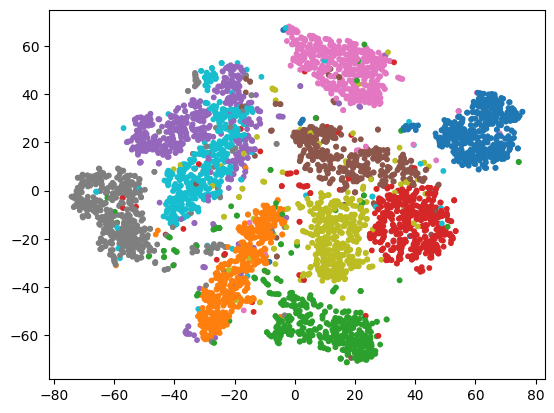

In [14]:
import matplotlib.pyplot as plt
y_tsne = y_tsne.astype(int)
scatter = plt.scatter(
    X_embedded[:, 0],   # X coordinate (1st dimension from t-SNE)
    X_embedded[:, 1],   # Y coordinate (2nd dimension from t-SNE)
    c=y_tsne,            # color each point according to its digit label
    cmap="tab10",   # a 10-color palette for digits 0–9
    s=10            # size of the points
)
